In [ ]:
"""
C(u) = sum[(B(i,n))*Pi)

Bernstein Polynomial:
  B(i,n) = nCi * u^i * (1-u)^(n-i)

input:
  Pi = Control points
  n = Degree of curve/polynomial
  u = parameter (0 < u < 1)

"""

'\nC(u) = sum[(B(i,n))*Pi)\n\nBernstein Polynomial:\n  B(i,n) = nCi * u^i * (1-u)^(n-i)\n\ninput:\n  Pi = Control points\n  n = Degree of curve/polynomial\n  u = parameter (0 < u < 1)\n\n\n\n\n\n'

In [ ]:
#factorial

def fact(f):
  if f < 0:
    return 0  # Return 0 for negative inputs to avoid division by zero
  elif f == 0:
    return 1
  else:
    return f * fact(f-1)

In [ ]:
#bernstein polynomial

def Bernstein(i, n, u):
  """
  Calculates the Bernstein polynomial B(i, n) for a given parameter u.

  Args:
    i: The index of the control point.
    n: The degree of the Bezier curve.
    u: The parameter value (0 <= u <= 1).

  Returns:
    The value of the Bernstein polynomial.
  """
  if i < 0 or i > n:
      return 0
  if u < 0 or u > 1:
      pass

  nCi = fact(n) / (fact(i) * fact(n - i))
  B = nCi * (u**i) * ((1 - u)**(n - i))
  return B


In [ ]:
class Point:
  def __init__(self, x, y, z):
    self.x = float(x)
    self.y = float(y)
    self.z = float(z)

  def __repr__(self):
    return f"Point(x = {self.x}, y = {self.y}, z = {self.z})"

In [ ]:
"""
  Calculates a point on a Bezier curve for a given parameter u.

  Args:
    control_points: A list of Point objects representing the control points.
    u: The parameter value (0 <= u <= 1).

  Returns:
    A Point object representing the point on the Bezier curve.

"""

def Bezier(control_points, u):
  n = len(control_points) - 1
  C_x = 0
  C_y = 0
  C_z = 0

  for i in range(n + 1):
    bernstein_val = Bernstein(i, n, u)
    C_x += bernstein_val * control_points[i].x
    C_y += bernstein_val * control_points[i].y
    C_z += bernstein_val * control_points[i].z

  return Point(C_x, C_y, C_z)

In [ ]:
#Bezier curve points
control_points = [Point(0, 0, 0), Point(1, 2, 3), Point(4, 5, 6)]
u_value = np.linspace(0, 1, 1000)
points_on_curve = [Bezier(control_points, u) for u in u_value]


In [ ]:
def visualize(points_on_curve, control_points):
  fig = plt.figure(figsize = (10, 10))
  ax = fig.add_subplot(111, projection = '3d')

#x, y, z points on curve
  x_values = [p.x for p in points_on_curve]
  y_values = [p.y for p in points_on_curve]
  z_values = [p.z for p in points_on_curve]

#control points (Pi)
  Px = [p.x for p in control_points]
  Py = [p.y for p in control_points]
  Pz = [p.z for p in control_points]


  ax.scatter(x_values, y_values, z_values, color = 'blue', label = 'Bezier Curve Points') # Label for curve points
  ax.scatter(Px, Py, Pz, color = 'red', s = 100, label = 'Control Points') # Add control points with a different color and size


  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.set_title('Bezier Curve with Control Points')
  ax.legend()
  plt.show()

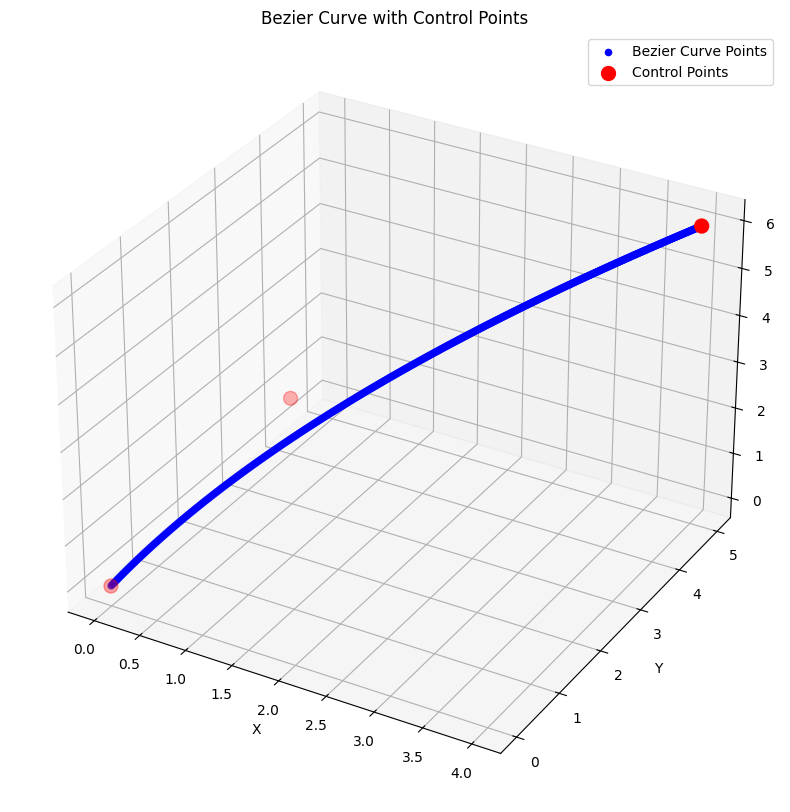

In [ ]:
visualize(points_on_curve, control_points)